# Daphney, Kosta, Tim, Rosana, Chrissy

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# How many days per week is this restaurant open?

In [2]:
df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

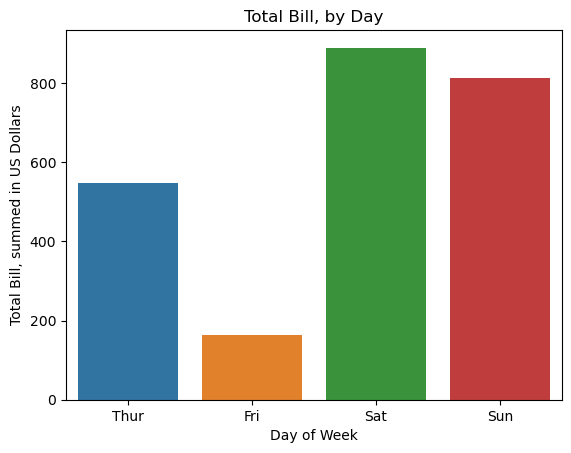

In [48]:
#nominal bill total amount by day
total_bill = sns.barplot(data = pivot, ci = True)
total_bill.set(xlabel = "Day of Week", ylabel = "Total Bill, summed in US Dollars", title = "Total Bill, by Day")
plt.show()

In [41]:
pivot = df.pivot_table(index = 'time', columns = 'day', values = 'total_bill', aggfunc = 'sum')
pivot

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,1077.55,89.92,0.0,0.00
Dinner,18.78,235.96,1778.4,1627.16


In [15]:
# Daphne used a new method to investigate categories within the data

df.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


# Investigation of Variables: 

## Continuous ------------ 
### (C) - tip in dollars,
### (C) - bill in dollars,
## Discrete --------------
### (D) - sex of the bill payer,
### (D) - whether there were smokers in the party,

## Actually Discrete (categorical), but SEEMED to be Continuous at first --
### (?) - day of the week,
### (?) - time of day,
### (?) - size of the party

### In all, the server recorded 244 tips, a relatively small sample of data.

# Need a Tip Percentage column, not just work with nominal values

In [5]:
#Tim
#adding in the tip percentage column
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
df['tip_percentage']= df['tip_percentage'].round(2)
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82


In [49]:
#are we getting more tips from female-customers or male-customers on a certain day?
pivot2 = df.pivot_table(index = 'sex', columns = 'day', values = 'tip', aggfunc = ('count'))
print("Count of Tippers, by Day and Sex") 
pivot2

Count of Tippers, by Day and Sex


day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [50]:
#tip percentage thru weekday & time
pivot3 = df.pivot_table(index = 'day', columns = ('time', 'sex'), values = 'tip_percentage')
print("Avg Tip Percentage by Day, Time, and Sex")
pivot3

Avg Tip Percentage by Day, Time, and Sex


time      Lunch                Dinner           
sex        Male     Female       Male     Female
day                                             
Thur  16.527000  15.743871        NaN  15.970000
Fri   17.413333  19.972500  13.020000  19.914000
Sat         NaN        NaN  15.157288  15.646071
Sun         NaN        NaN  16.234310  18.156667

# Tipping Avg through the Week, by Gender

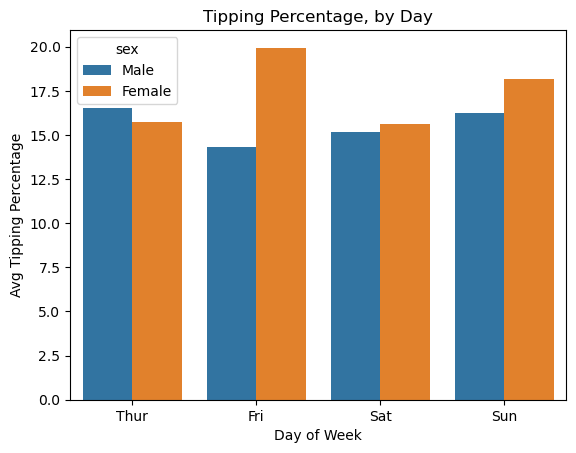

In [52]:
#Kosta
#tip percentage by day
percentage = sns.barplot(data = df, x = "day", y = "tip_percentage", hue = "sex", ci = None)
percentage.set(xlabel = 'Day of Week', ylabel = 'Avg Tipping Percentage', title = 'Gendered Tipping Percentage, by Day')
plt.show()

# Tipping Avg through the Week, by Smoker Status

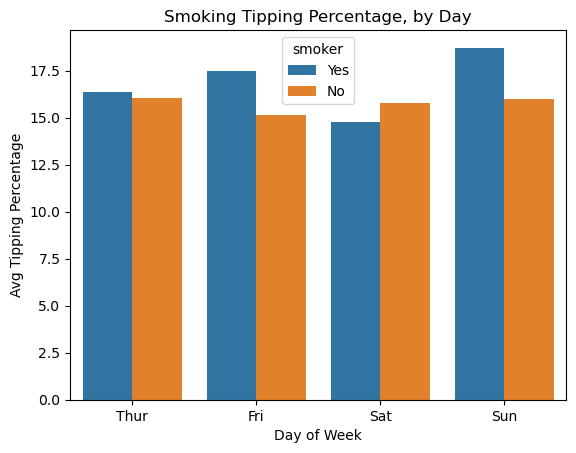

In [53]:
#do smokers tip more/less?
smoker = sns.barplot(data = df, x = "day", y = "tip_percentage", hue = "smoker", ci = None)
smoker.set(xlabel = 'Day of Week', ylabel = 'Avg Tipping Percentage', title = 'Smoking Tipping Percentage, by Day')
plt.show()

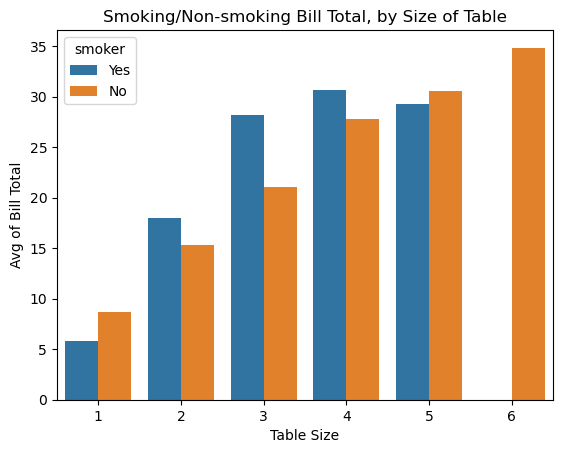

In [54]:
#Rosana
#does table size impact bill size at all?
tabletop = sns.barplot(data = df, x = "size", y = "total_bill", hue = "smoker", ci = False)
tabletop.set(xlabel = 'Table Size', ylabel = 'Avg of Bill Total', title = 'Smoking/Non-smoking Bill Total, by Size of Table')
plt.show()

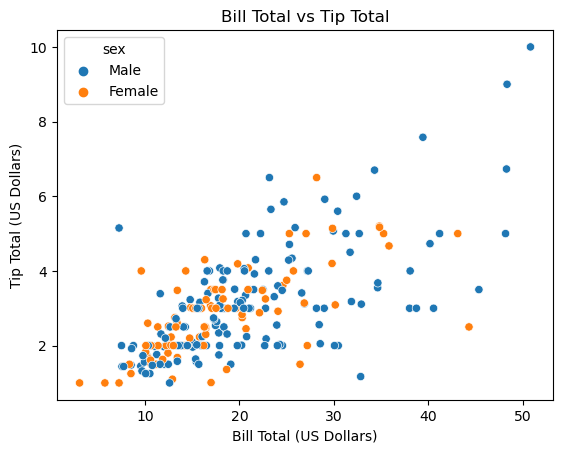

In [55]:
#does total_bill_size impact total_tip?
tipsize = sns.scatterplot(data = df, x = "total_bill", y = "tip", hue = "sex", ci = True)
tipsize.set(xlabel = 'Bill Total (US Dollars)', ylabel = 'Tip Total (US Dollars)', title = 'Bill Total vs Tip Total')
plt.show()

[Text(0.5, 1.0, 'Variable Correlations')]

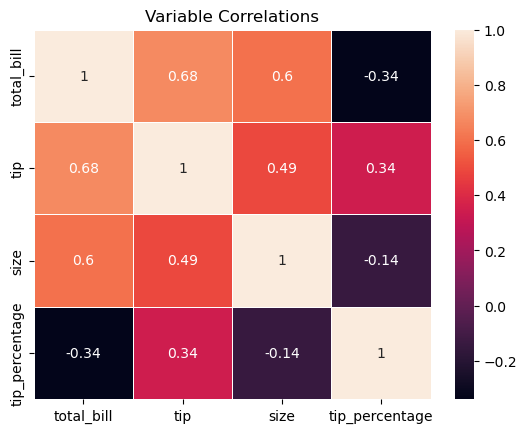

In [58]:
hotstuff = sns.heatmap(df.corr(), annot =True, linewidth=.7)
hotstuff.set(title='Variable Correlations')

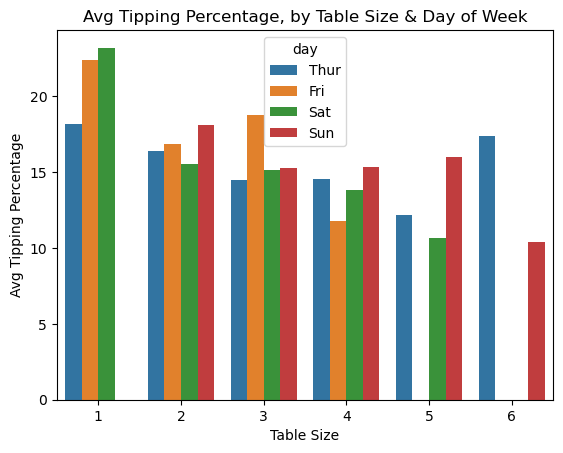

In [59]:
manybars = sns.barplot(data = df, x = "size", y = "tip_percentage", hue = "day", ci = None)
manybars.set(xlabel = 'Table Size', ylabel = 'Avg Tipping Percentage', title = 'Avg Tipping Percentage, by Table Size & Day of Week')
plt.show()

# Highest Tipping Avgs come from 1tops with low total bills, and 5-top or 6-top tables on Thurs+Weekend nights.

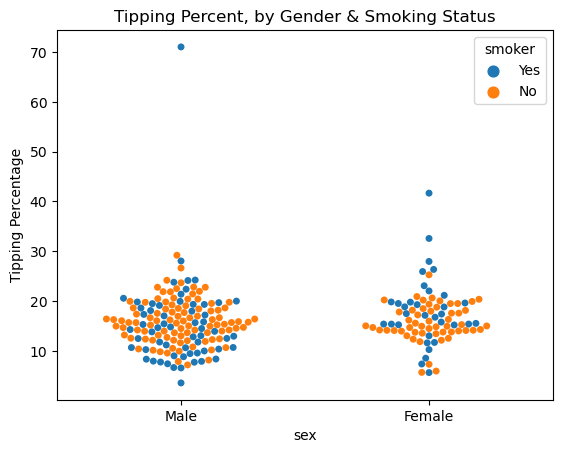

In [62]:
#tipping percentage by sex & smoker status

ax = sns.swarmplot(x = "sex", y ="tip_percentage", hue = "smoker", data = df)
ax.set(ylabel = 'Tipping Percentage', title = 'Tipping Percent, by Gender & Smoking Status')
plt.show()

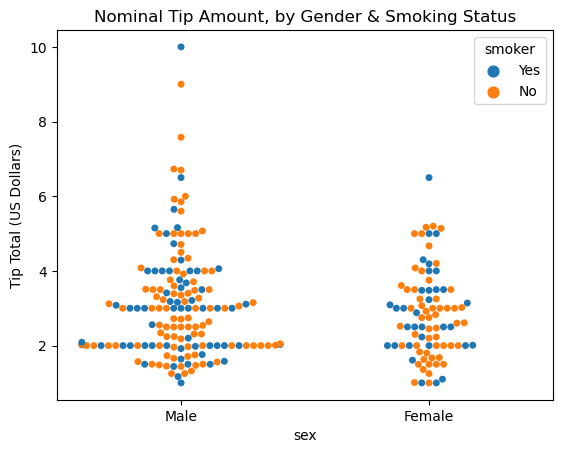

In [63]:
#avg tip amounts by sex & smoker status
ax2 = sns.swarmplot(x = "sex", y ="tip", hue = "smoker", data = df)
ax2.set(ylabel = 'Tip Total (US Dollars)', title = 'Nominal Tip Amount, by Gender & Smoking Status')
plt.show()

 # Lessons Learned
## * discrete vs continuous variables as "predictors" or correlations    
## * more data = more opportunities 

<AxesSubplot:>

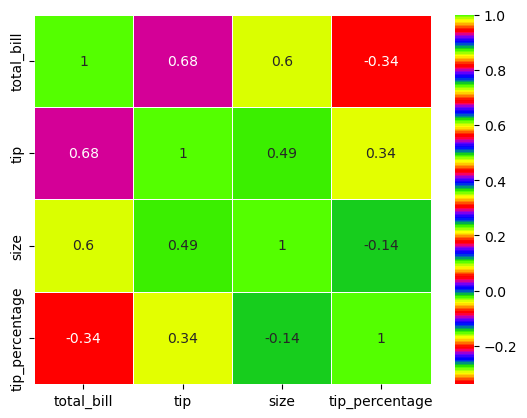

In [67]:
sns.heatmap(df.corr(), annot =True, linewidth=.7, cmap = 'prism')